# Task 1
    Plot the  Confusion Matrix of the given Data Set .
    Also write Story Telling Telling of the given Data Set

## 1. Problem
    We are tasked to perform Multi-class Classification using
    CNN(Convolutional Neural Networks) on MNIST data set mentioning each and every steps.

# 2. Dataset
    The Dataset contain 10,000 test and 60,000 handwritten images from 0 to 9.
    'test'	10,000
    'train'	60,000

## 3. Data Preparation
    We will be using the MNIST data set from tensorflow library to perform CNN
    on the number images to analyse and visualize the effect of CNN on the
    neural networks.

## 4. Apply CNN(Convolution Neural Networks)
    We will Apply CNN(Convolution Neural Networks) on the given mnist dataset.
    

## 5. Evalute the CNN Model
      Then Evalute the model on test data and predict accuracy and Confusion matrix

## Importing nescessary libraries

In [14]:
## Import all the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
## Import mnist dataset tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

In [ ]:
## load the mnist dataset and spit into test and train

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
## Check the Shape of Single digits for better understanding
print("shape of X_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of X_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of X_train (60000, 28, 28)
shape of y_train (60000,)
shape of X_test (10000, 28, 28)
shape of y_test (10000,)


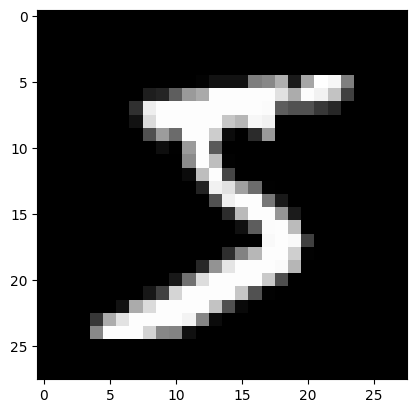

In [ ]:
## plot the image of mnist number

plt.imshow(x_train[0],cmap = "gray")

In [ ]:
## Normalize the x_data

x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

## CNN model layers

In [ ]:
## split the datasets
import tensorflow as tf
from keras.layers import Dense ,Flatten ,Dropout ,Conv2D ,MaxPooling2D
from keras.models import Sequential


In [ ]:
## Create layers
model = Sequential()

##first convolution and Maxpooling
model.add(Conv2D(filters = 32 ,kernel_size=(3,3) , activation= "relu" ,input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size =(2,2)))

## 2nd COnvolution and pooling
model.add(Conv2D(filters = 32 ,kernel_size=(3,3) , activation= "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten())

## First hidden layer
model.add(Dense(units = 32 ,activation = "relu" ))

## Remove unnecessary nodes
model.add(Dropout(rate = 0.2))

## Defining the Output layers
model.add(Dense(units = 10 ,activation = "softmax"))

model.compile(loss = "categorical_crossentropy" ,optimizer = "adam" ,metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
## fit the model
from keras.utils import to_categorical

y_test_category = to_categorical(y_test)
y_train_category = to_categorical(y_train)
modelH = model.fit(x_train_normalized,y_train_category,batch_size = 32 ,epochs = 20 ,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 18s 5ms/step - loss: 0.3037 - accuracy: 0.9053 - val_loss: 0.0880 - val_accuracy: 0.9734
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1189 - accuracy: 0.9640 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.0551 - val_accuracy: 0.9837
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0512 - val_accuracy: 0.9856
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0537 - accuracy: 0.9826 - val_loss: 0.0460 - val_accuracy: 0.9871
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0468 - val_accuracy

## Model Evalution

In [ ]:
## Basic accuracy of model
modelScore= model.evaluate(x_test ,y_test_category)

val_loss , val_acc =modelScore
print("loss",val_loss)
print("Accuracy",val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 28.0788 - accuracy: 0.9758
loss 28.078771591186523
Accuracy 0.9757999777793884


In [ ]:
## Predict the values
y_preds = np.argmax(model.predict(x_test),axis = 1 )
print(classification_report(y_test ,y_preds))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.96      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       1.00      0.96      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.87      1.00      0.93       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
## Print the Confusion Matrix
cm = confusion_matrix(y_test ,y_preds)
print(cm)

[[ 971    1    0    0    1    0    1    1    5    0]
 [   0 1091    3    2    3    0    1    0   35    0]
 [   1    1 1015    3    2    0    0    2    8    0]
 [   0    0    1 1001    0    4    0    1    3    0]
 [   0    0    1    0  969    0    0    0    6    6]
 [   1    0    0    9    0  874    1    0    7    0]
 [   4    0    1    0    5    4  919    0   25    0]
 [   0    1   13    7    2    0    0  992    6    7]
 [   1    0    1    0    0    0    0    0  972    0]
 [   1    0    0    2    4    2    0    1   45  954]]


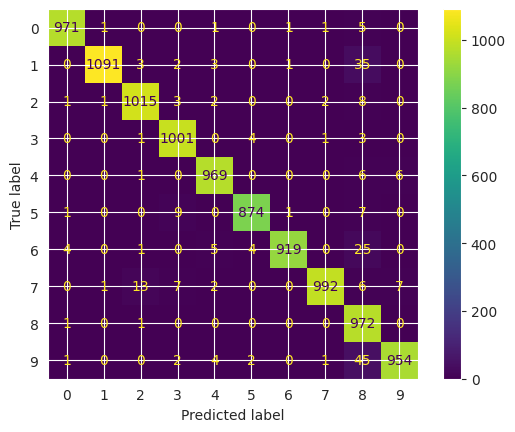

In [17]:
## Display the confusion matrix
cd = ConfusionMatrixDisplay(cm)
cd.plot()

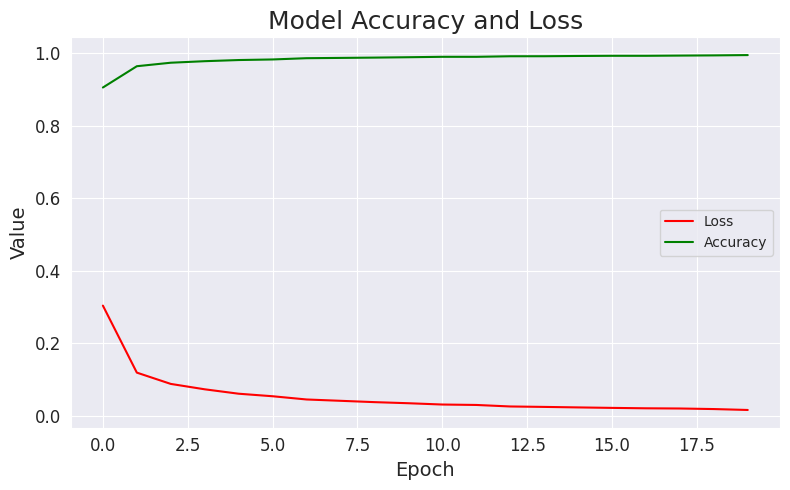

In [ ]:
## Evaluate the graph of epochs vs loss and Accuracy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.figure(figsize=(8,5))
plt.plot(modelH.epoch, modelH.history["loss"], color="red", label="Loss")
plt.plot(modelH.epoch, modelH.history["accuracy"], color="green", label="Accuracy")

plt.title("Model Accuracy and Loss", fontsize=18)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(loc="best")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

